In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

%cd /content/drive/My Drive/
!ls

Mounted at /content/drive/
/content/drive/My Drive
'Colab Notebooks'   data


In [ ]:
data_noisy = np.load('data/signal_waves_noisy.npy')
x_val_noisy,y_val_noisy = data_noisy[:,0],data_noisy[:,1]
data_pure = np.load('data/signal_waves.npy')
x_val_pure,y_val_pure = data_pure[:,0],data_pure[:,1]

In [ ]:
#print(data_noisy)
np.shape(x_val_noisy)
test = y_val_noisy[0]

In [ ]:
np.shape(data_noisy)

(200000, 2, 600)

In [ ]:
np.shape(x_val_noisy[0])
print(y_val_noisy[0].shape)
print(y_val_noisy[1].shape)
print(y_val_noisy.shape)

(600,)
(600,)
(200000, 600)


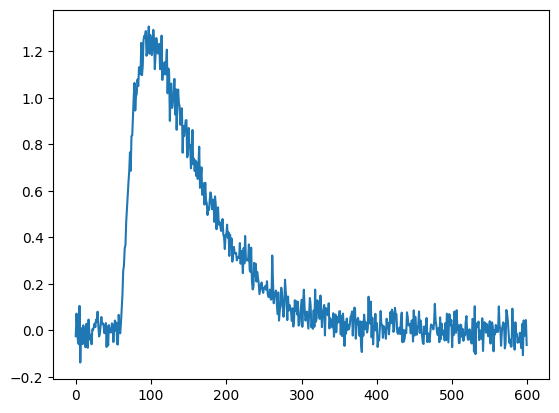

In [ ]:
plt.plot(y_val_noisy[0])

In [ ]:
#import the needed libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras import initializers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Assuming x_val_noisy and x_val_pure are your input and target datasets respectively
X_train, X_test, Y_train, Y_test = train_test_split(y_val_noisy, y_val_pure, test_size=0.2, random_state=42)

# Model architecture
model = Sequential()
model.add(Input(shape=(600,)))  # Adjust the input shape based on your data
model.add(Dense(300, activation='relu'))  # Encoder layer
model.add(Dropout(0.5))
model.add(Dense(150, activation='relu'))  # Bottleneck layer
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))  # Decoder layer
model.add(Dropout(0.5))
model.add(Dense(600, activation='linear'))  # Output layer, adjust the units based on your target data

# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=5, batch_size=256, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}')


Epoch 1/5
500/500 [==============================] - 14s 26ms/step - loss: 0.0173 - val_loss: 0.0191
Epoch 2/5
500/500 [==============================] - 13s 26ms/step - loss: 0.0068 - val_loss: 0.0179
Epoch 3/5
500/500 [==============================] - 14s 28ms/step - loss: 0.0056 - val_loss: 0.0171
Epoch 4/5
500/500 [==============================] - 13s 26ms/step - loss: 0.0050 - val_loss: 0.0146
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0138
Test loss: 0.013760647736489773


In [ ]:
# Assuming X_test contains your test set noisy signals
denoised_signals = model.predict(X_test)
print("Denoised Signals:", denoised_signals)


1250/1250 [==============================] - 4s 3ms/step
Denoised Signals: [[ 9.3187433e-04  4.9541187e-03  1.8740339e-02 ...  1.1642436e-03
   1.1081496e-03  1.3433838e-03]
 [-3.8589767e-04 -2.2272965e-04  6.4944034e-04 ...  2.6983183e-03
   2.6545583e-03  2.1800932e-03]
 [-2.4754056e-04 -4.9204077e-04 -1.5580712e-03 ...  2.1011499e-03
   2.6395379e-03  1.9696932e-03]
 ...
 [-1.9738625e-04 -5.7943648e-04 -1.1110114e-03 ...  1.6624156e-03
   1.6013696e-03  1.3263078e-03]
 [-8.6118453e-05 -9.2470349e-04  4.8866938e-04 ...  3.7489377e-03
   4.3705497e-03  3.8893600e-03]
 [ 1.3347203e-04 -4.4736697e-04 -2.3462686e-04 ...  1.5104905e-03
   1.6576009e-03  1.5655619e-03]]


1250/1250 [==============================] - 3s 3ms/step


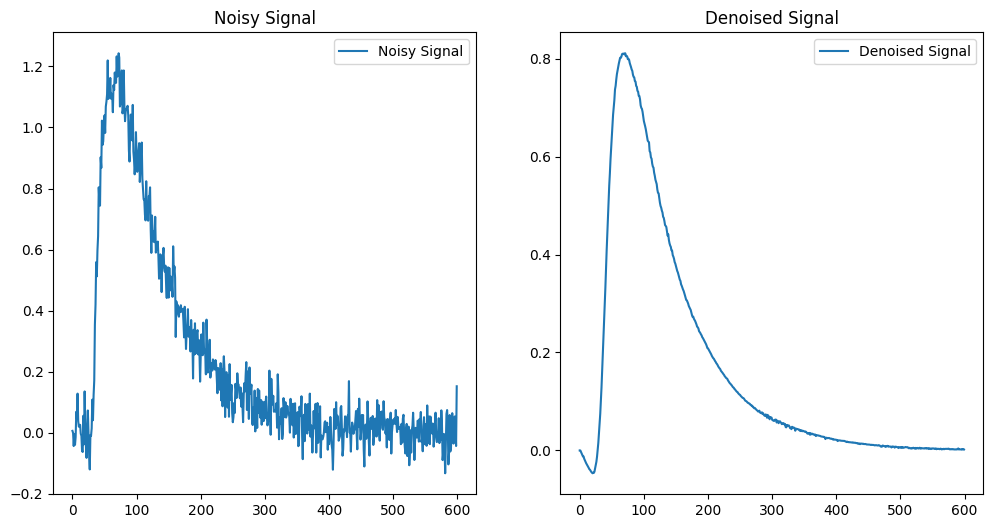

In [ ]:
# Assuming X_test contains your noisy test data
denoised_signals = model.predict(X_test)

# Select a sample to display
sample_index = 15  # You can change this index to view different samples

# Plotting the noisy and denoised signals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(X_test[sample_index], label='Noisy Signal')
plt.title('Noisy Signal')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(denoised_signals[sample_index], label='Denoised Signal')
plt.title('Denoised Signal')
plt.legend()

plt.show()
